In [1]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

<img src = './ggplot2_faceting.png'/>

# Lay out panels in a grid

**`facet_grid()`**: forms a matrix of panels defined by row and column faceting variables. It is most useful when you have two discrete variables, and all combinations of the variables exist in the data. If you have only one variable with many levels, try facet_wrap().

**Usage**
```R
facet_grid(
  rows = NULL,
  cols = NULL,
  scales = "fixed",
  space = "fixed",
  shrink = TRUE,
  labeller = "label_value",
  as.table = TRUE,
  switch = NULL,
  drop = TRUE,
  margins = FALSE,
  facets = NULL
)
````
**Arguments**  
`rows`, `cols`	
A set of variables or expressions quoted by vars() and defining faceting groups on the rows or columns dimension. The variables can be named (the names are passed to labeller).

For compatibility with the classic interface, rows can also be a formula with the rows (of the tabular display) on the LHS and the columns (of the tabular display) on the RHS; the dot in the formula is used to indicate there should be no faceting on this dimension (either row or column).

`scales`	
Are scales shared across all facets (the default, "fixed"), or do they vary across rows ("free_x"), columns ("free_y"), or both rows and columns ("free")?

`space`	
If "fixed", the default, all panels have the same size. If "free_y" their height will be proportional to the length of the y scale; if "free_x" their width will be proportional to the length of the x scale; or if "free" both height and width will vary. This setting has no effect unless the appropriate scales also vary.

`shrink`	
If TRUE, will shrink scales to fit output of statistics, not raw data. If FALSE, will be range of raw data before statistical summary.

`labeller`	
A function that takes one data frame of labels and returns a list or data frame of character vectors. Each input column corresponds to one factor. Thus there will be more than one with vars(cyl, am). Each output column gets displayed as one separate line in the strip label. This function should inherit from the "labeller" S3 class for compatibility with labeller(). You can use different labeling functions for different kind of labels, for example use label_parsed() for formatting facet labels. label_value() is used by default, check it for more details and pointers to other options.

`as.table`	
If TRUE, the default, the facets are laid out like a table with highest values at the bottom-right. If FALSE, the facets are laid out like a plot with the highest value at the top-right.

`switch`	
By default, the labels are displayed on the top and right of the plot. If "x", the top labels will be displayed to the bottom. If "y", the right-hand side labels will be displayed to the left. Can also be set to "both".

`drop`	
If TRUE, the default, all factor levels not used in the data will automatically be dropped. If FALSE, all factor levels will be shown, regardless of whether or not they appear in the data.

`margins`	
Either a logical value or a character vector. Margins are additional facets which contain all the data for each of the possible values of the faceting variables. If FALSE, no additional facets are included (the default). If TRUE, margins are included for all faceting variables. If specified as a character vector, it is the names of variables for which margins are to be created.

`facets`	
This argument is soft-deprecated, please use rows and cols instead.

<b style = 'color:red'>NOTE</b><br>  
`facet_grid(scales = 'fixed')`: `sharex = True, sharey = True` in MATPLOTLIB  
`facet_grid(scales = 'free_x')`: `sharex = False` in MATPLOTLIB  
`facet_grid(scales = 'free_y')`: `sharey = False` in MATPLOTLIB  
`facet_grid(scales = 'free')`: `sharex = False, sharey = False` in MATPLOTLIB  


# Example

In [7]:
setwd('C:/Users/dell/PycharmProjects/MachineLearning/Pandas/datasets')
getwd()

[1] "C:/Users/dell/PycharmProjects/MachineLearning/Pandas/datasets"

In [8]:
tips <- read.csv('./tips.csv')
head(tips)

X,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4


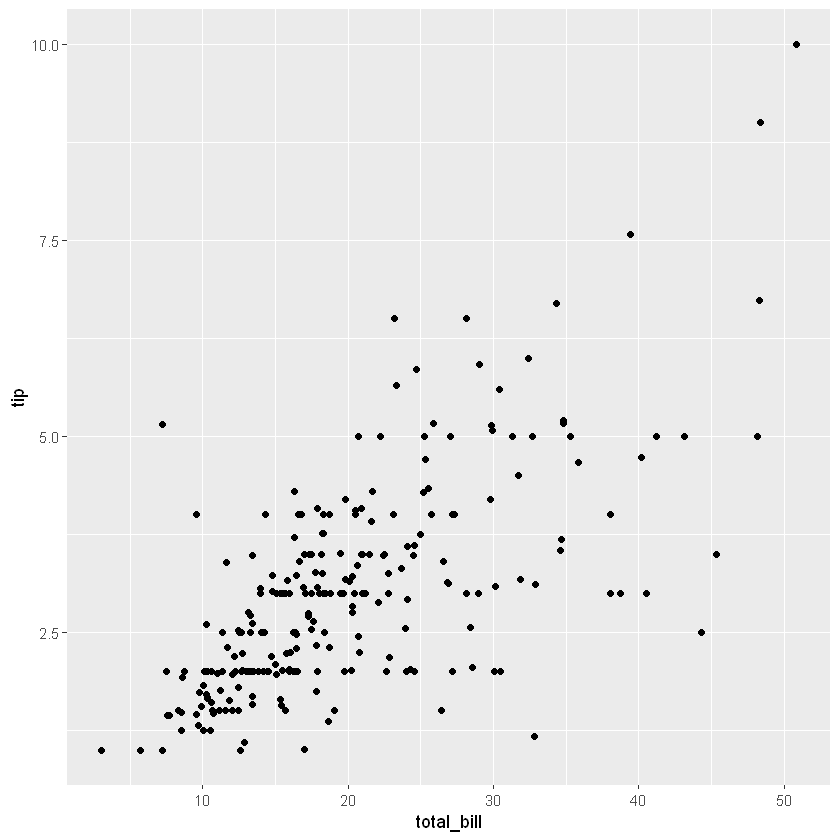

In [9]:
plot <- ggplot(tips, aes(total_bill, tip)) + geom_point()
plot

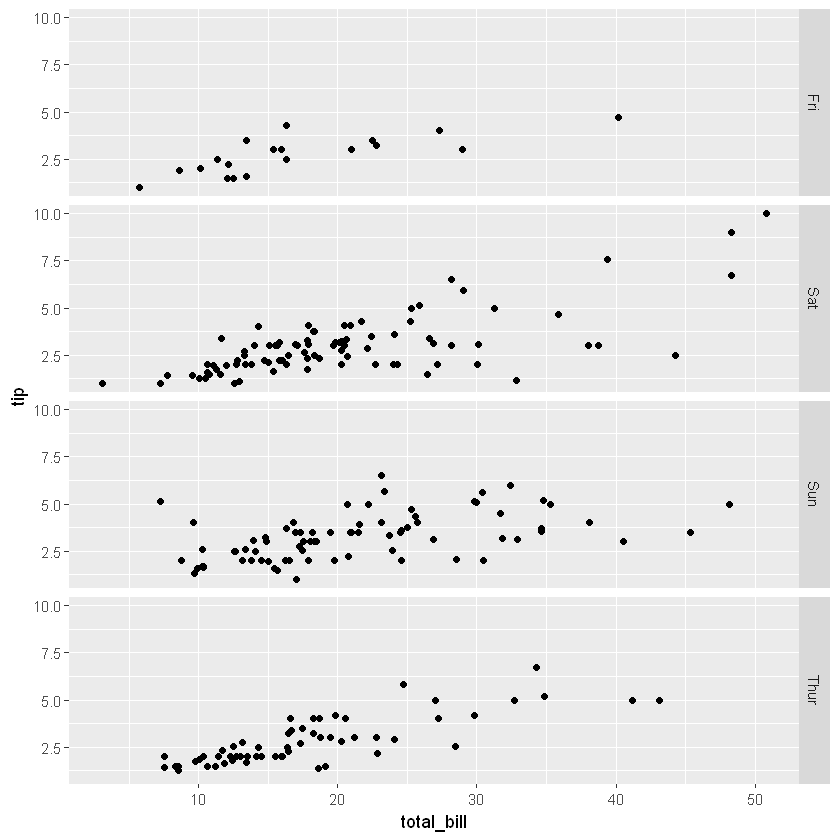

In [38]:
#by row
plot + 
facet_grid(rows = vars(day)) #equivalent: facet_grid(day ~ .)


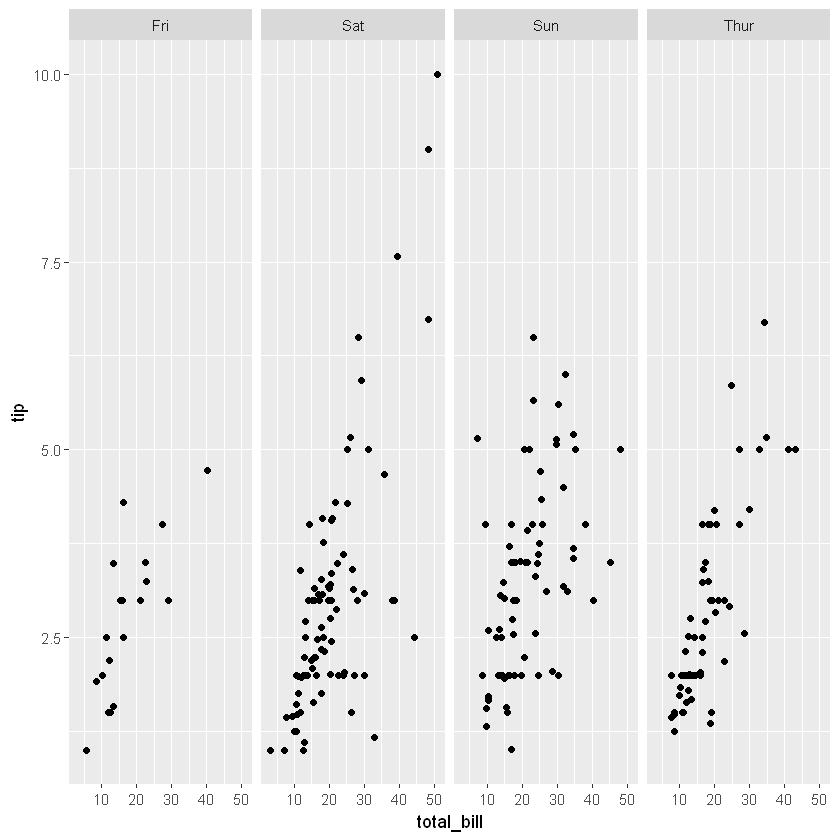

In [37]:
#by column
plot + 
facet_grid(. ~ day) #equivalent: facet_grid(cols = vars(day))

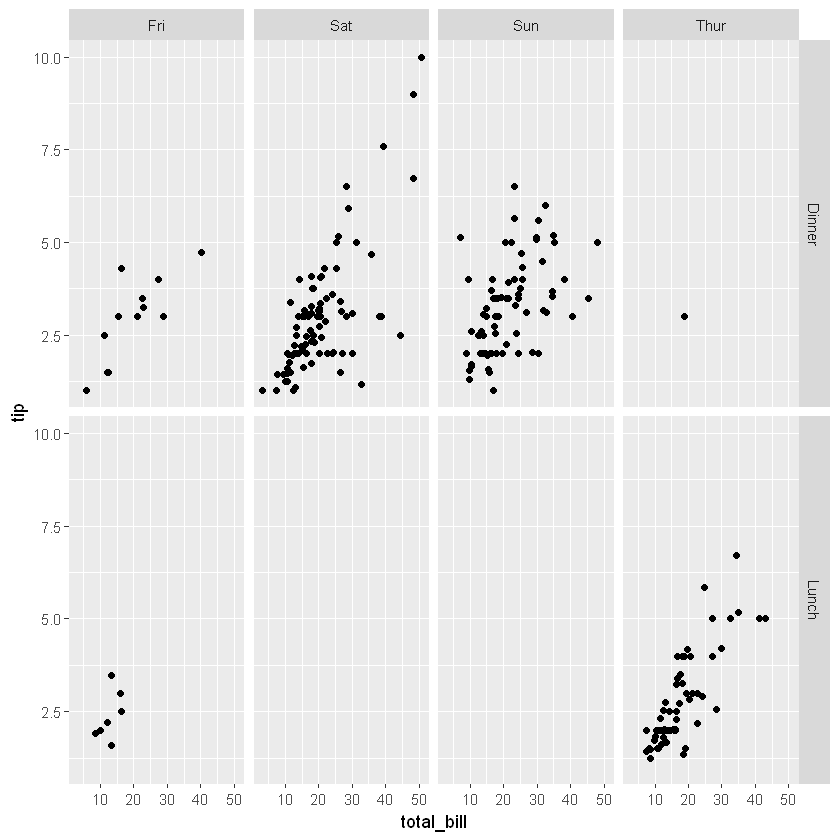

In [12]:
plot + 
facet_grid(rows = vars(time), cols = vars(day)) #equivalent: facet_grid(time ~ day)

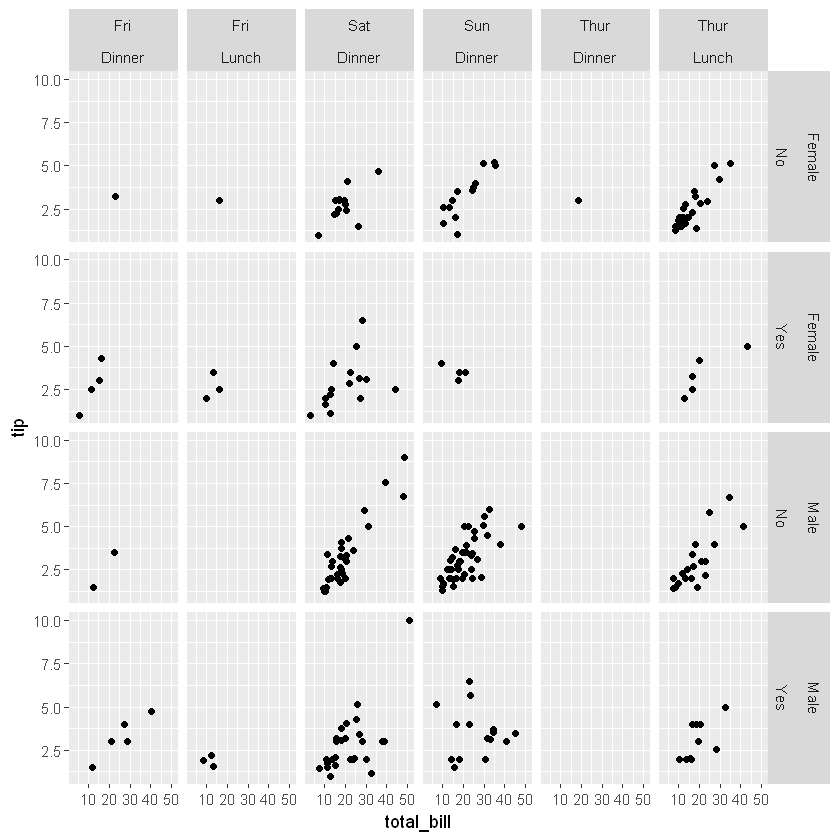

In [39]:
plot + 
facet_grid(sex + smoker ~ day + time) #equivalent: facet_grid(vars(sex, smoker), vars(day, time))

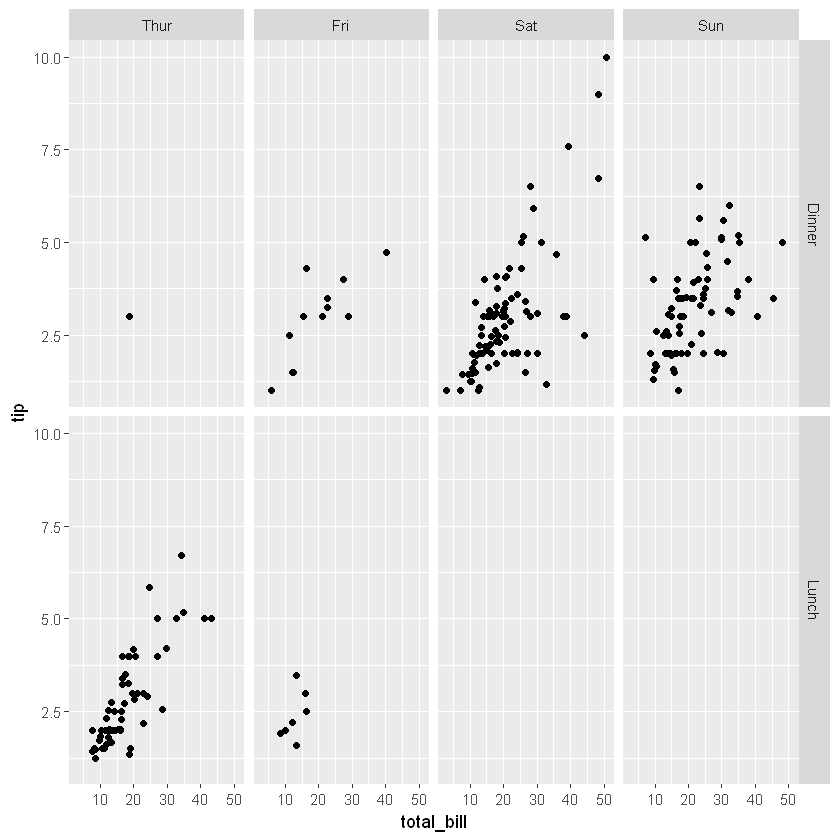

In [14]:
# To change plot order of facet grid,
# change the order of variable levels with factor()
plot +
facet_grid(
    vars(time),
    vars(factor(day, levels = c('Thur', 'Fri', 'Sat', 'Sun')))
)

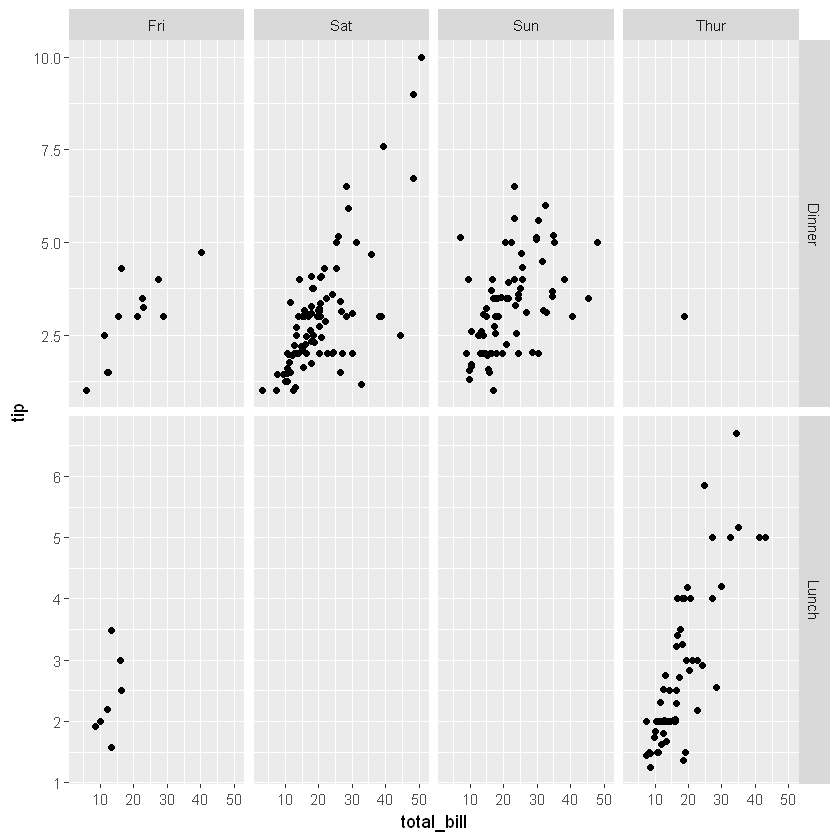

In [18]:
# Free scales -------------------------------------------------------
# You can also choose whether the scales should be constant
# across all panels (the default), or whether they should be allowed
# to vary
#Basically, scales == 'free_y' allows each facet having different y-scale
#(e.g: facet 1 scale y from 1 to 10, facet 2 scale y from 50 - 100)
#           scales == 'free_x' allows each factet having different x-scale
#---------------------
#scales = 'free_y' in MATPLOTLIB means sharey = False
plot + 
facet_grid(vars(time), vars(day) , scales = 'free_y')

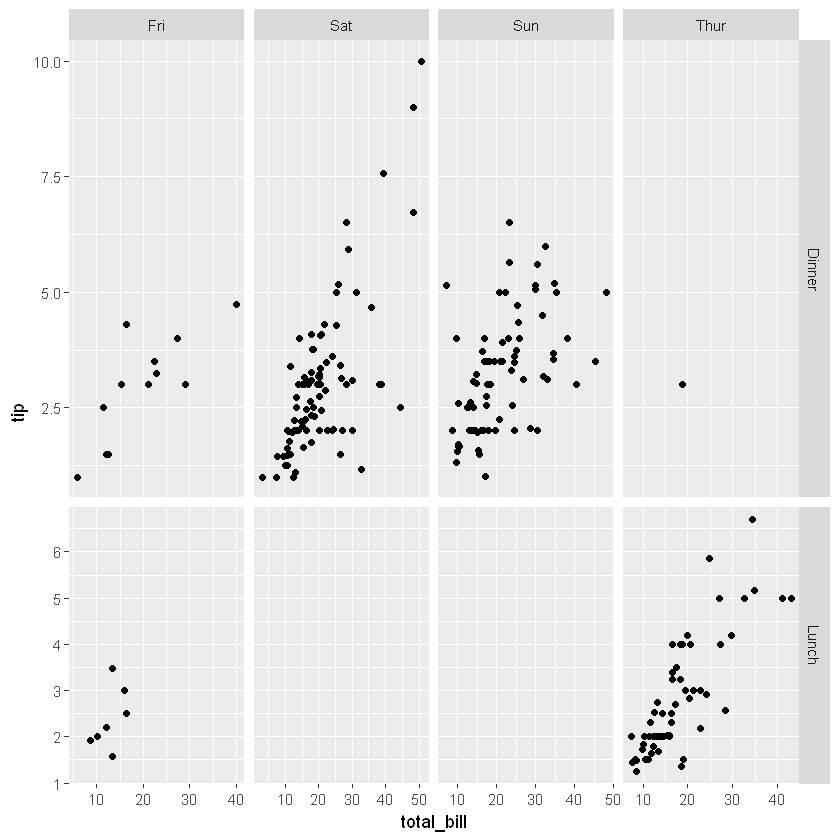

In [25]:
#Basicaly, space = 'free_x' allows each panel having diffrent width
#space = 'free_y' allows each panel having different height
#space = 'free' is a combination of both
#----------------
#If "fixed", the default, all panels have the same size.
#If "free_y" their height will be proportional to the length of the y scale;
#if "free_x" their width will be proportional to the length of the x scale; or if "free" both height and width will vary. This setting has no effect unless the appropriate scales also vary.
plot + 
facet_grid(time ~ day, 
           space = 'free_y', #the width of each facet is proportional to the length of the y axis
           scales = 'free')

#NOTICE: the height of facets on the first row is higher then the height of facets on the second row

<hr>

In [26]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


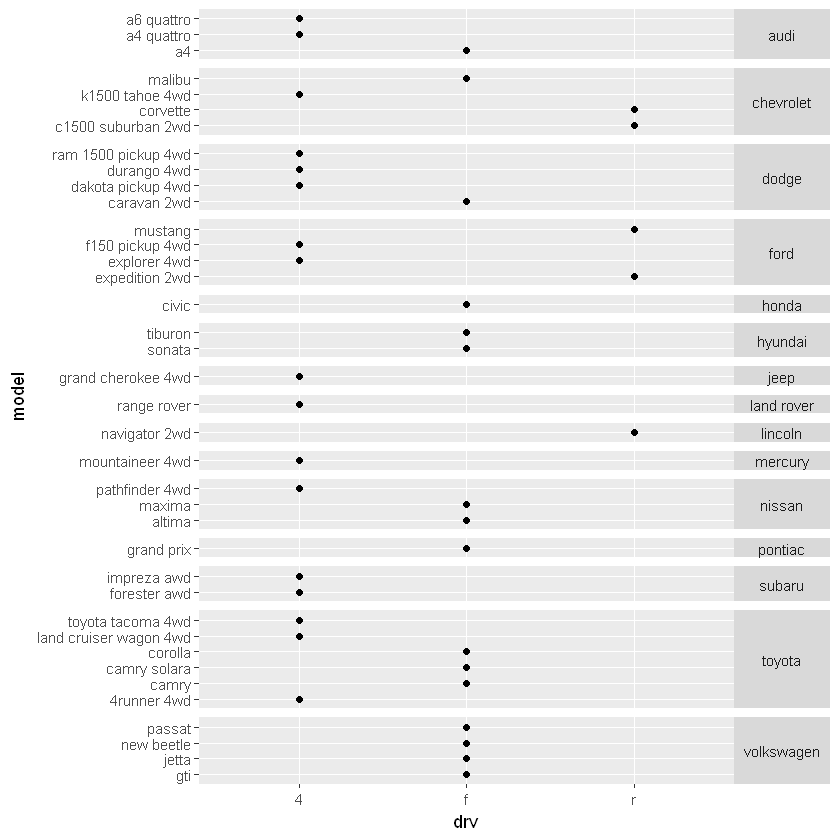

In [34]:

# If scales and space are free, then the mapping between position
# and values in the data will be the same across all panels. This
# is particularly useful for categorical axes
ggplot(mpg, aes(drv, model)) +
  geom_point() +
  facet_grid(rows = vars(manufacturer), scales = "free", space = "free") +
  theme(strip.text.y = element_text(angle = 0))



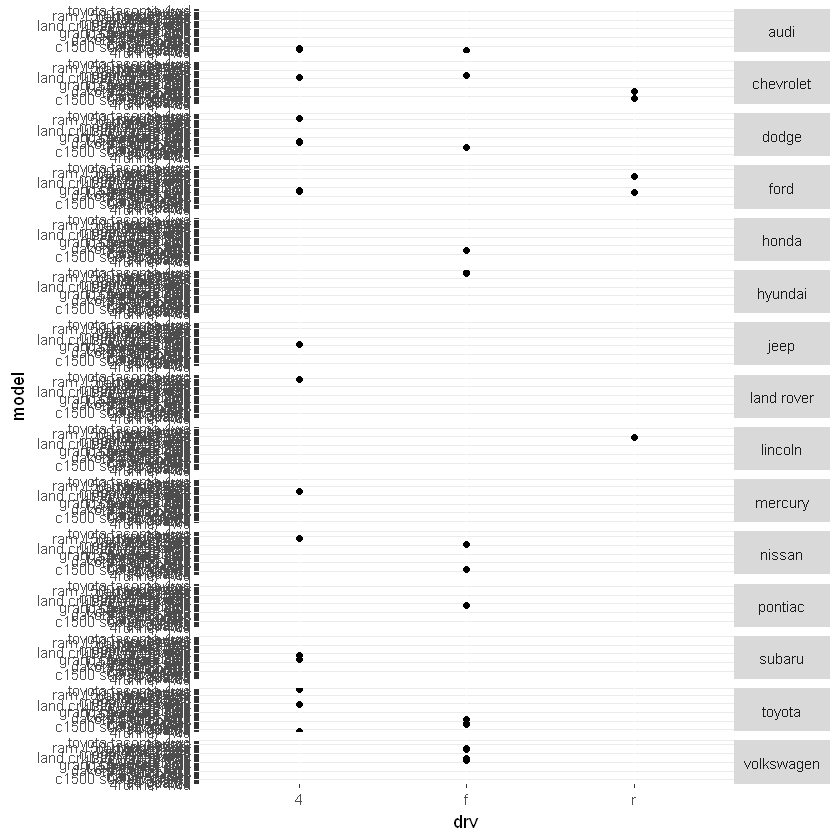

In [31]:
#by setting scales = 'free', space = 'free', each facet having different height
#so ticklabels on y axis will not be overlapped

#let's see what happen for the default case: overlapping yticklabels
ggplot(mpg, aes(drv, model)) +
  geom_point() +
  facet_grid(manufacturer ~ .) + #default
  theme(strip.text.y = element_text(angle = 0))


<hr>

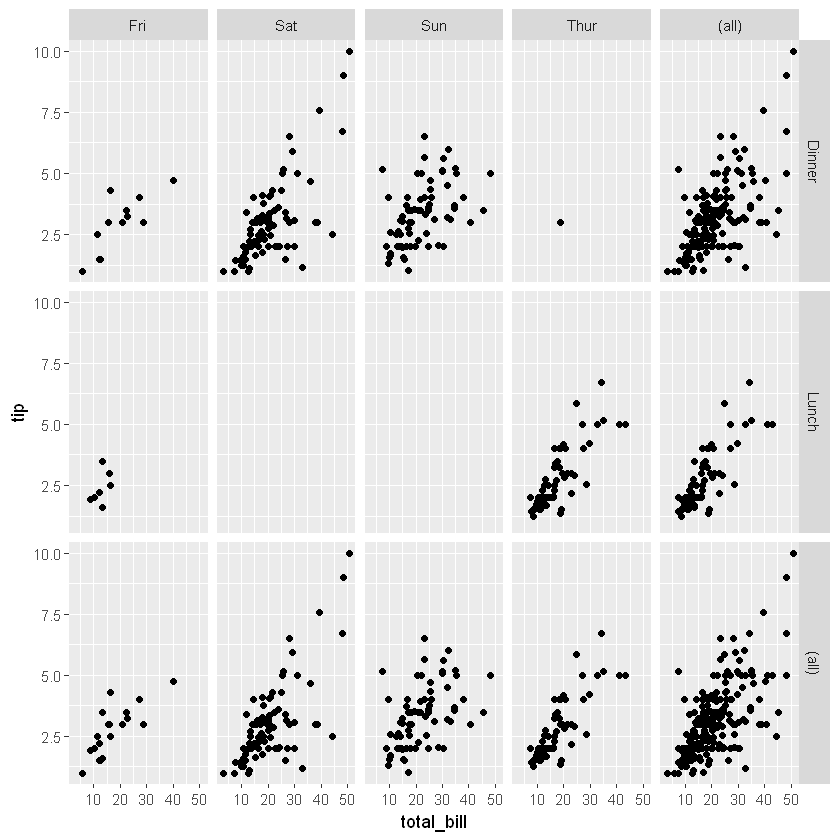

In [40]:
#Adding margins
#Refer to: Chi-square test for independence of 2 variables to know how to create margin
#What is margin?         col_sum
#   |1,2|   -----> |1,2|3    
#   |3,4|          |3,4|7
#         row_sum  |4,6,10
#adding a column row sum
#adding a row that is column sum
plot + 
facet_grid(time ~ day, margins = TRUE)
#NOTICE: The last facet on the first row is the combination of previous facet on the same row
#        The first facet on the last row in the combination of previous facet on the same column

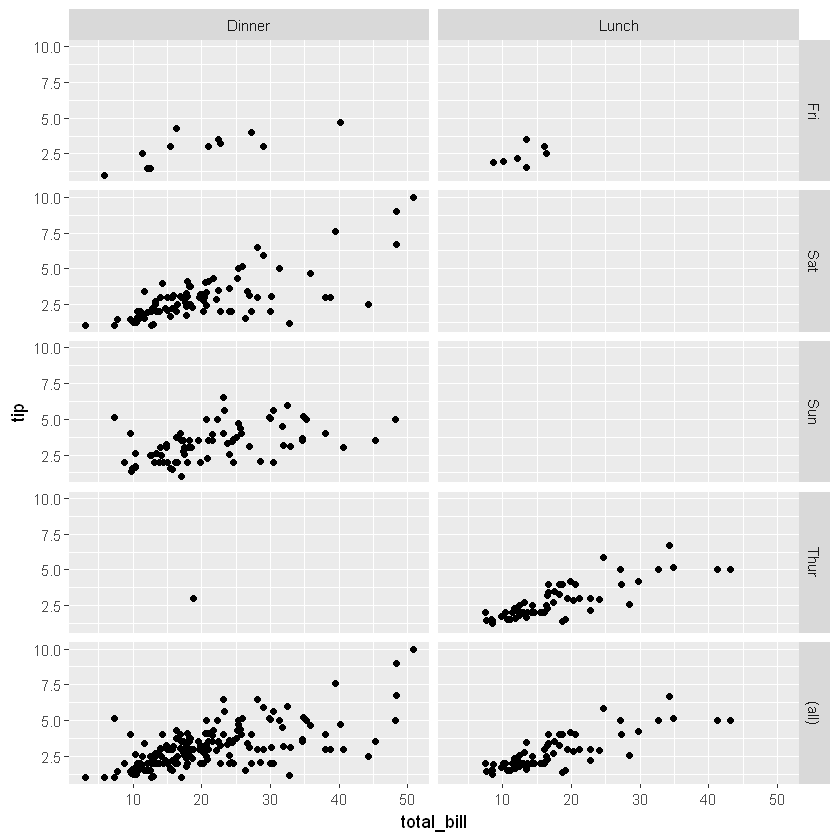

In [46]:
#calculate margin for only variable `day`

plot +
facet_grid(day ~ time, margins = 'day') #we have to use a string, this is not a QUOTING FUNCTION